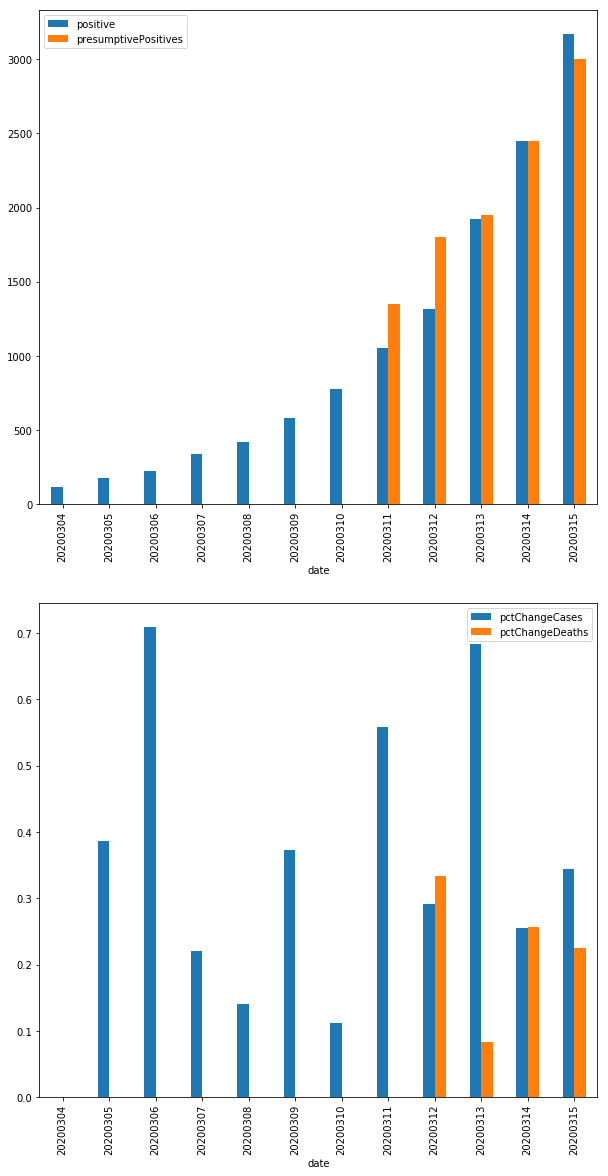

In [136]:
import httplib2
import json
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import numpy as np
import pandas as pd
from datetime import datetime

countrySummary = 'https://covidtracking.com/api/us/daily'
statesCurrent = 'https://covidtracking.com/api/states/daily'
h = httplib2.Http('.cache')

(response,stateDataRaw) = h.request(statesCurrent,'GET')
stateData=json.loads(stateDataRaw.decode('UTF-8'))

#print(final)
#jsfinal = json.loads(final)
#print(jsfinal)
#for obj in stateData:
#    if(obj['state'] == 'UT'):
#        print(obj)
        
def convertToDate(s): 
    return datetime.strptime(str(s), '%Y%m%d')

(response,countryRaw) = h.request(countrySummary,'GET')
countryDf = pd.DataFrame(json.loads(countryRaw.decode('UTF-8')))
countryDf['dateTransformed'] = countryDf['date'].apply(convertToDate)
countryDf['pctChangeCases'] = countryDf['total'].pct_change(fill_method='pad')
countryDf['pctChangeDeaths'] = countryDf['death'].pct_change(fill_method='pad')
countryDf['presumptivePositives'] = countryDf['death'].apply(lambda d:  d/.02)
countryCleanDf = countryDf.fillna(0)
#print(countryCleanDf)
#countryDf['testingError'] = countryDf.apply(lambda o: o['presumptivePositives'] - o['death'])

fig, (countryAx,percAx) = plt.subplots(nrows=2,ncols=1,figsize=(10,20))
testing = countryDf[['date', 'positive', 'presumptivePositives']]
testing.plot.bar(ax=countryAx,x='date')

percChange = countryDf[['date','pctChangeCases','pctChangeDeaths']]
percChange.plot.bar(ax=percAx,x='date')                   


In [3]:
#plt.plot([1,2,3,4],[2,4,8,16], "ro")
#plt.ylabel('test plot')
#plt.show()
#(fig,(country, state)) = plt.subplots(1,2, figsize=(13,4.8))
ax = df.plot.bar(x='date', y='positive', color='blue')

utahRaw = list(filter(lambda n: n['state'] == 'UT', stateData))
#print(utahRaw)
utah = sorted(utahRaw, key=lambda n: n['date'])
utahdays = list(map(lambda n: str(n['date'])[-2:], utah))
utahcount = list(map(lambda n: n['total'], utah))
utahpositive = list(map(lambda n: n['positive'], utah))
#country.plot(days,counts)

#country.bar(days,positives)
#state.plot(utahdays,utahcount)
#state.plot(utahdays,utahpositive)

NameError: name 'plt' is not defined